In [2]:
%matplotlib inline
import glob
import matplotlib.pyplot as plt
import numpy as np

from skimage.feature import hog
from skimage import data, exposure
 
import cv2

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path = 'drive/My Drive/INRIA/Assignment/INRIA'

completed loop8
Ali


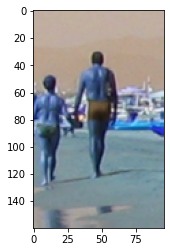

In [7]:
# Train_pos = []
# for image in glob.glob(path+'/Train/pos/*.png'):
    
#     img= cv2.imread(image)
#     Train_pos.append(img)
# print('completed loop1')
# for image in glob.glob(path+'/Train/pos/*.jpg'):
#     img= cv2.imread(image)
#     Train_pos.append(img)
# print('completed loop2')
# Train_neg = []
# for image in glob.glob(path+'/Train/neg/*.png'):
#     img= cv2.imread(image)
#     Train_neg.append(img)
# print('completed loop3')
# for image in glob.glob(path+'/Train/neg/*.jpg'):
#     img= cv2.imread(image)
#     Train_neg.append(img)
# print('completed loop4')


# Test_pos = []
# for image in glob.glob(path+'/Test/pos/*.png'):
#     img= cv2.imread(image)
#     Test_pos.append(img)
# print('completed loop5')
# for image in glob.glob(path+'/Test/pos/*.jpg'):
#     img= cv2.imread(image)
#     Test_pos.append(img)
# print('completed loop6')
# Test_neg = []
# for image in glob.glob(path+'/Test/neg/*.png'):
#     img = cv2.imread(image)
#     Test_neg.append(img)
# print('completed loop7')
for image in glob.glob(path+'/Test/neg/*.jpg'):
    img = cv2.imread(image)
    Test_neg.append(img)
print('completed loop8')
print('Ali')
plt.imshow(Train_pos[0])


In [10]:


Train_p_fds = []
Train_p_hog = []

Train_n_fds = []
Train_n_hog = []

Test_p_fds = []
Test_p_hog = []

Test_n_fds = []
Test_n_hog = []

#image resizing for standardization
count = 0
for image in Train_pos:
  Train_pos[count] = cv2.resize(image,(96,160))
  count+=1

count = 0
for image in Train_neg:
  Train_neg[count] = cv2.resize(image,(96,160))
  count+=1

count = 0
for image in Test_pos:
  Test_pos[count] = cv2.resize(image,(96,160))
  count+=1

count = 0
for image in Test_neg:
  Test_neg[count] = cv2.resize(image,(96,160))
  count+=1



for img in Train_pos:
  fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)
  Train_p_fds.append(fd)
  Train_p_hog.append(hog_image)

for img in Train_neg:
  fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)
  Train_n_fds.append(fd)
  Train_n_hog.append(hog_image)

for img in Test_pos:
  fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)
  Test_p_fds.append(fd)
  Test_p_hog.append(hog_image)
for img in Test_neg:
  fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)
  Test_n_fds.append(fd)
  Test_n_hog.append(hog_image)




In [15]:
import numpy as np
Train_p_Labels = []
for fds in Train_p_fds:
  Train_p_Labels.append('pos')

Train_p_Labels = np.array(Train_p_Labels).reshape(len(Train_p_Labels),1)
Train_p_fds = np.array(Train_p_fds)
Train_pos = np.hstack((Train_p_fds,Train_p_Labels))



Train_n_Labels = []
for count in Train_n_fds:
  Train_n_Labels.append('neg')

Train_n_Labels = np.array(Train_n_Labels).reshape(len(Train_n_Labels),1)
Train_n_fds = np.array(Train_n_fds)
Train_neg = np.hstack((Train_n_fds,Train_n_Labels))

Train = np.concatenate((Train_neg,Train_pos), axis=0)

np.random.shuffle(Train)
Train = np.array(Train)





Test_p_Labels = []
for count in Test_p_fds:
  Test_p_Labels.append('pos')

Test_p_Labels = np.array(Test_p_Labels).reshape(len(Test_p_Labels),1)
Test_p_fds = np.array(Test_p_fds)
Test_pos = np.hstack((Test_p_fds,Test_p_Labels))

Test_n_Labels = []
for count in Test_n_fds:
  Test_n_Labels.append('neg')

Test_n_Labels = np.array(Test_n_Labels).reshape(len(Test_n_Labels),1)
Test_n_fds = np.array(Test_n_fds)
Test_neg = np.hstack((Test_n_fds,Test_n_Labels))


Test = np.concatenate((Test_neg,Test_pos), axis=0)
Test = np.array(Test)



In [16]:
x_train = Train[:,:-1]
y_train = Train[:,-1:]

In [17]:
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score

clf = svm.SVC()
clf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
x_test = Test[:,:-1]
y_test = Test[:,-1:]

In [19]:
y_pred = clf.predict(x_test)

In [26]:
from sklearn.metrics import confusion_matrix

Accuracy: 0.9684542586750788


              precision    recall  f1-score   support

         neg       0.95      0.93      0.94       453
         pos       0.97      0.98      0.98      1132

    accuracy                           0.97      1585
   macro avg       0.96      0.96      0.96      1585
weighted avg       0.97      0.97      0.97      1585

Confusion matrix, without normalization
[[ 423   30]
 [  20 1112]]
Normalized confusion matrix
[[0.93 0.07]
 [0.02 0.98]]


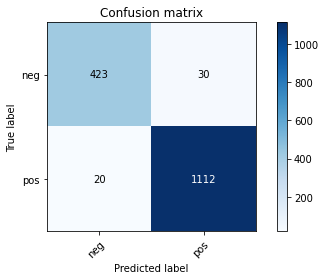

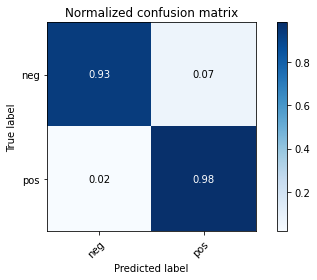

In [29]:
print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))
plotConfusions(y_test,y_pred)

In [27]:
def plotConfusionMatrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [28]:
def plotConfusions(true, predictions):
    np.set_printoptions(precision=2)

    class_names = ["neg","pos"]
    plotConfusionMatrix(true, predictions, classes=class_names,
                      title='Confusion matrix')

    plotConfusionMatrix(true, predictions, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

    plt.show()

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
y_pred = rf.predict(x_test)

Accuracy: 0.9520504731861199


              precision    recall  f1-score   support

         neg       0.95      0.88      0.91       453
         pos       0.95      0.98      0.97      1132

    accuracy                           0.95      1585
   macro avg       0.95      0.93      0.94      1585
weighted avg       0.95      0.95      0.95      1585

Confusion matrix, without normalization
[[ 397   56]
 [  20 1112]]
Normalized confusion matrix
[[0.88 0.12]
 [0.02 0.98]]


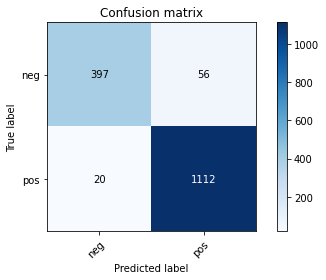

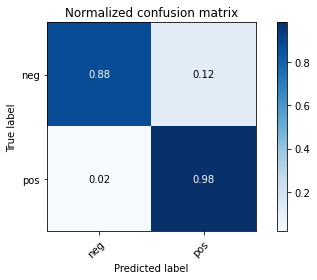

In [33]:
print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))
plotConfusions(y_test,y_pred)